# OLD calibration MASK with prepropagation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
from pyaxions import spectools as sp
import importlib
plt.rcParams["figure.figsize"] = (20,10)

In [29]:
fa  = pa.findmfiles('out')
logia = pa.gml(fa ,'logi') 
cta   = pa.gml(fa ,'ct') 
# st  = pa.stringo(f)
fa[-1]

'out/m/axion.m.00162'

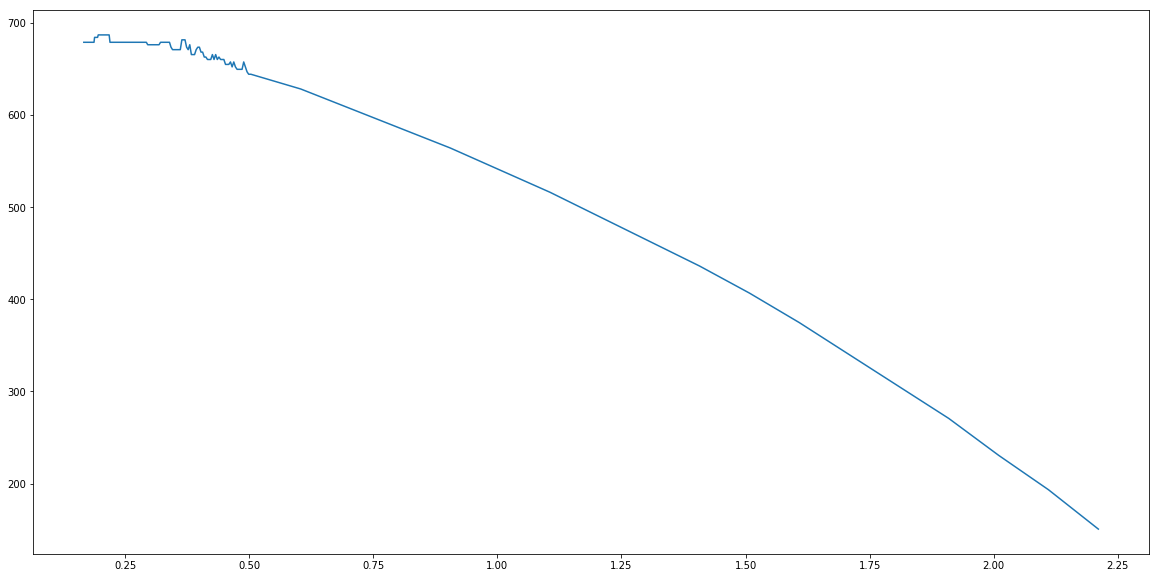

In [30]:
plt.plot(cta,pa.gml(fa,'stringN')*2/3)

In [31]:
f  = pa.findmfiles('out')
f = f[pa.gml(f,'msp?')]
logi = pa.gml(f ,'logi') 
ct   = pa.gml(f ,'ct') 
# st  = pa.stringo(f)
f[-1]

Excluded corrupted file in out/: out/m/axion.m.00163


'out/m/axion.m.00162'

# Setup
First I run with a defined set of settings that control the mask width

vil, vil2 are natural maskings and are fixed

RED is filtered with $\sigma =$ radius_mask, which is defined in lattice units

In [32]:
msa = pa.gm(f[0],'msa')
msa

0.5

In [33]:
mid=-1
lis=sorted(pa.gm(f[mid],'msp_info'))
print(lis)
lis=[lis[1],lis[3],lis[4],lis[5],lis[0],lis[2],
     lis[7],lis[9],lis[10],lis[11],lis[6],lis[8],lis[-2],lis[-1]]
lis

['W_Gau_16.00', 'W_Gau_2.00', 'W_Gau_20.00', 'W_Gau_3.00', 'W_Gau_4.00', 'W_Gau_8.00', 'W_Red_16.00', 'W_Red_2.00', 'W_Red_20.00', 'W_Red_3.00', 'W_Red_4.00', 'W_Red_8.00', 'W_Vi', 'W_Vi2']


['W_Gau_2.00',
 'W_Gau_3.00',
 'W_Gau_4.00',
 'W_Gau_8.00',
 'W_Gau_16.00',
 'W_Gau_20.00',
 'W_Red_2.00',
 'W_Red_3.00',
 'W_Red_4.00',
 'W_Red_8.00',
 'W_Red_16.00',
 'W_Red_20.00',
 'W_Vi',
 'W_Vi2']

# Gaussian REDO

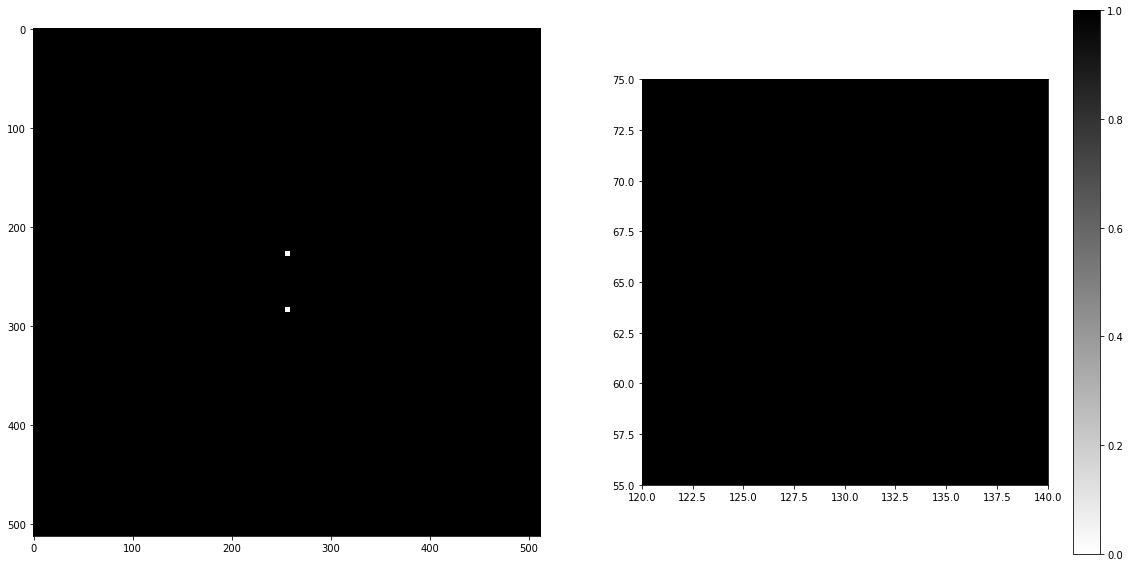

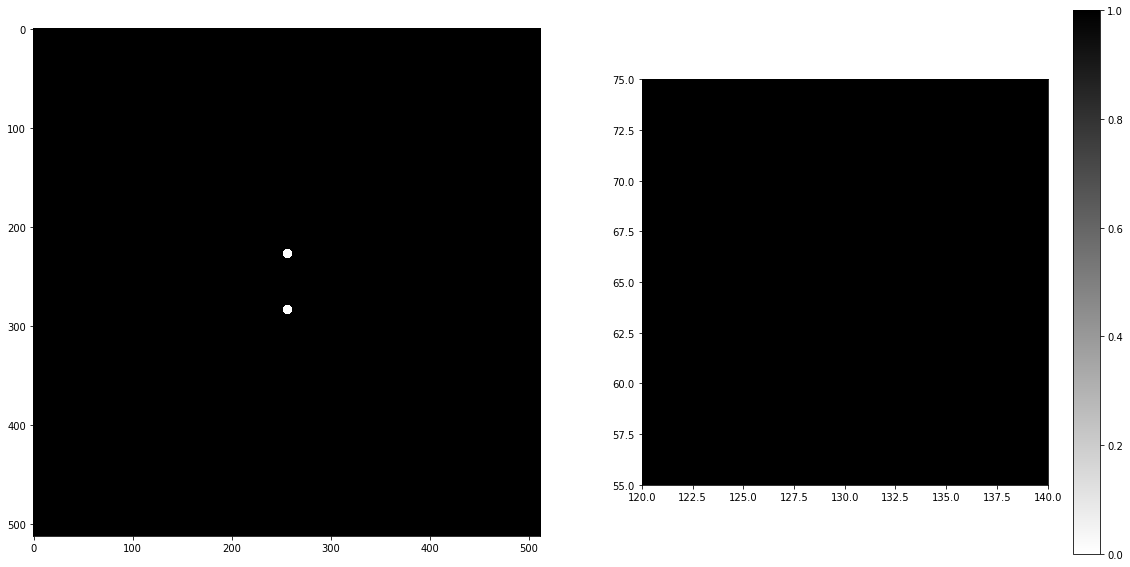

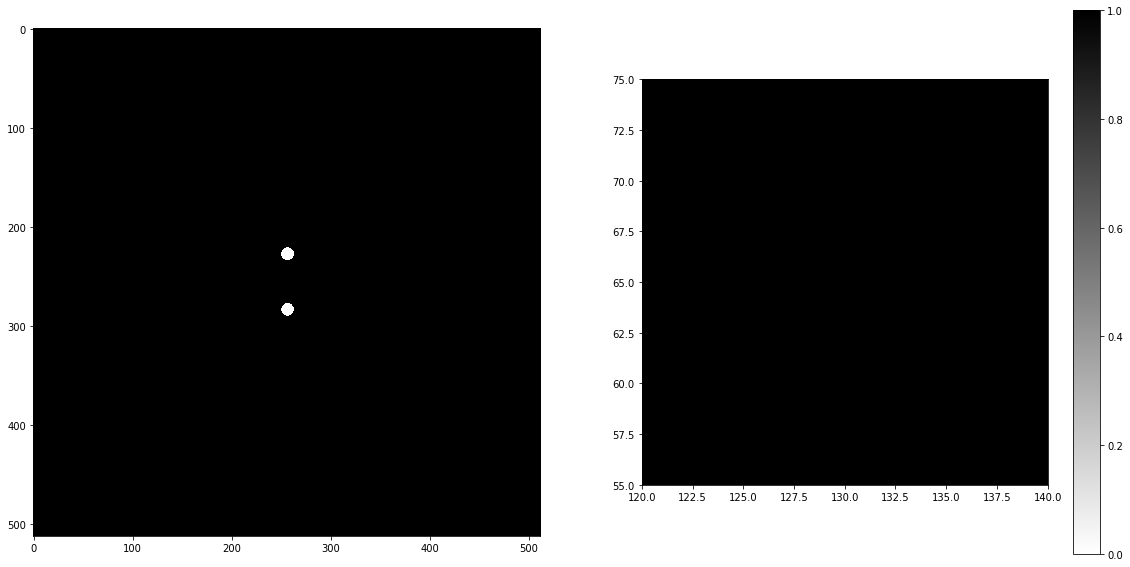

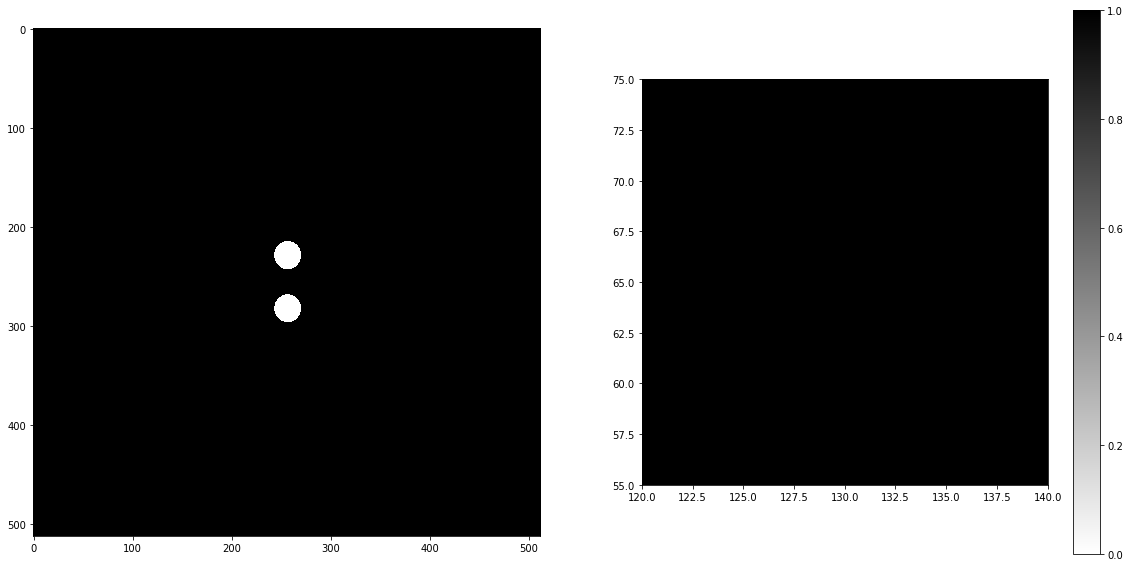

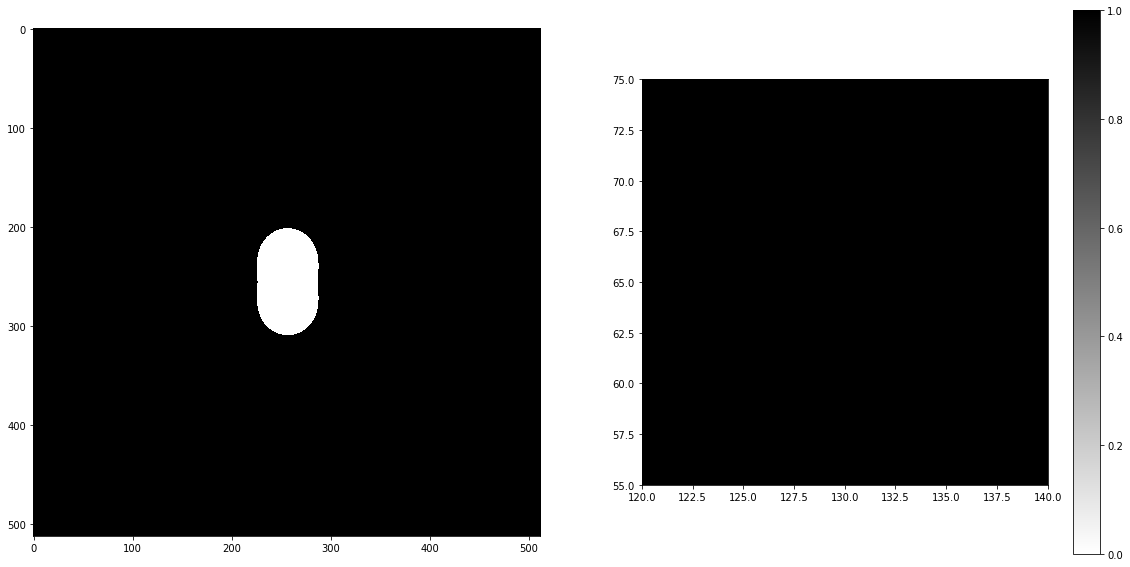

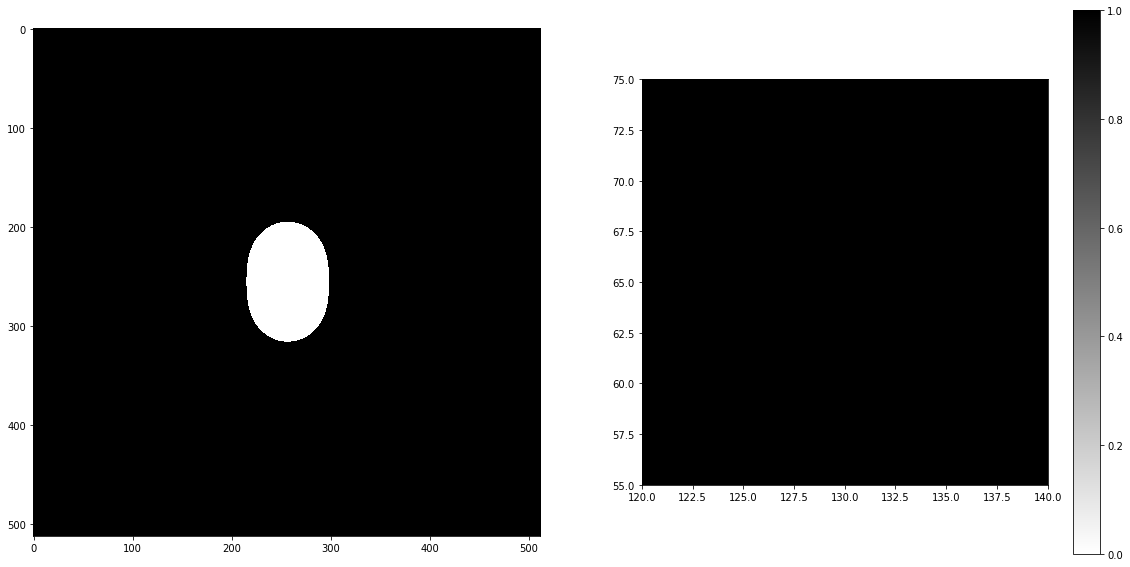

In [34]:
for st in lis:
    if (st[:3] == "W_R" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

1 - Data look reasonable

2 - Calibration in the perpendicular plane

3 - statistical calibration with length * pi * r^2

4 - Calibration with length and W0

5 - Calibration with string Length

In [35]:
# rsize = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.5,4,5,6,7,8,9])
rsize = np.array([2.0,3.0,4.0,8.0,16.0,20.0])
rsize/msa

array([ 4.,  6.,  8., 16., 32., 40.])

In [36]:
# the Ft0 is the sum mask
# we then square it and multiply it by L3/N6
renorm=(pa.gm(f[mid],'sizeN')**6/pa.gm(f[mid],'L')**3)

sL = pa.gm(f[mid],'stringN')*2/3
print("String length is %f"%(sL))
print("Initial intended was %f"%(2*np.pi*pa.gm(f[mid],'sizeN')/4))

# ma3D = pa.gm(f[mid],'sizeN')**3 - np.sqrt(pa.gm(f[mid],'mspW_Dif_0.50')[0]*renorm)
ma3D = np.sqrt(pa.gm(f[mid],'mspW_Red_2.00')[0]*renorm)
print(ma3D,ma3D/pa.gm(f[mid],'sizeN')**3)
print('Circular case: Points per Unit length = ma3D/(2 pi N/4) = %f'%(ma3D/(np.pi*pa.gm(f[mid],'sizeN')/2)))


String length is 150.666667
Initial intended was 804.247719
8299.0 6.183236837387085e-05
Circular case: Points per Unit length = ma3D/(2 pi N/4) = 10.318960


In [37]:
pa.gm(f[mid],'stDens')

0.009989359864482607

In [38]:
pusR=[]
for st in lis:
    if (st[:3] == "W_R" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusR.append([(a == 0).sum(),ma3D/(sL)])
        
pusR=np.array(pusR)

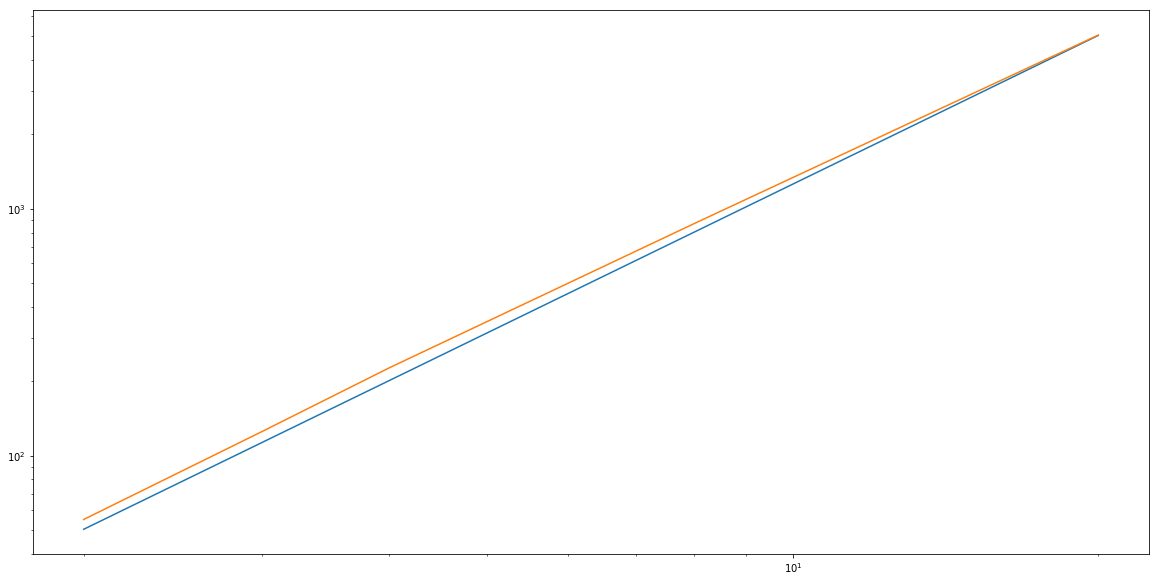

In [39]:
plt.loglog(rsize,np.pi*(rsize/msa)**2)
# plt.loglog(rsize,pusR[:,0])
plt.loglog(rsize,pusR[:,1])

In [40]:
# The calibration is perfect already
# naturally it is not very good for small r

Text(0.5, 0, 'rmask [lattice units]')

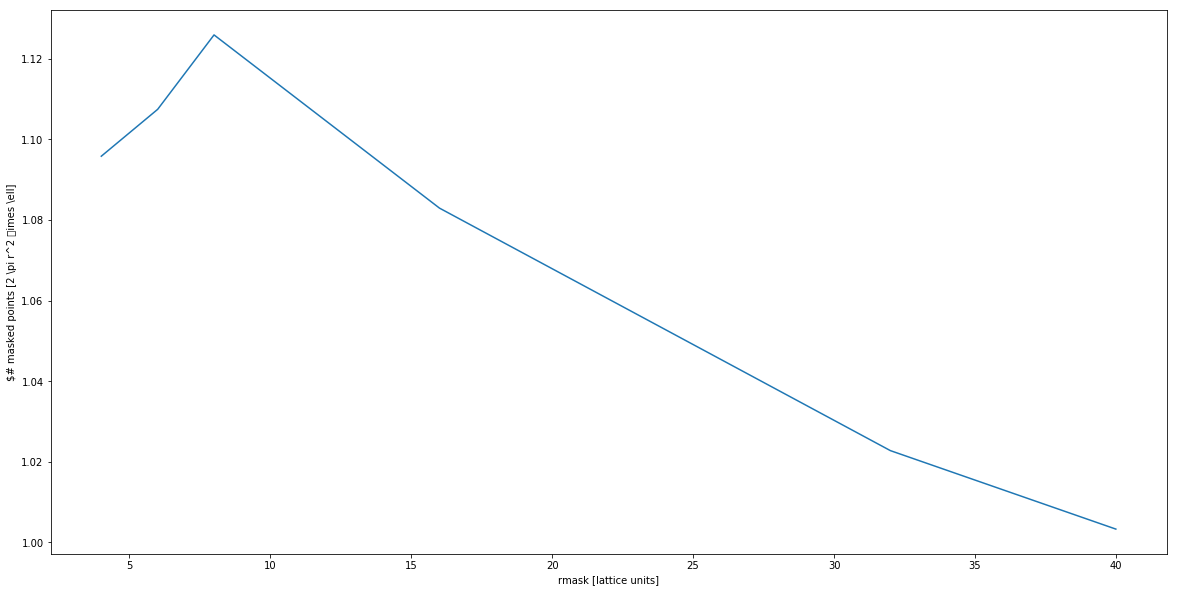

In [41]:
# plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.ylabel('$# masked points [2 \pi r^2 \times \ell]')
plt.xlabel('rmask [lattice units]')

# For all values of time

In [42]:
pa.gm(f[-1],'msp?')

True

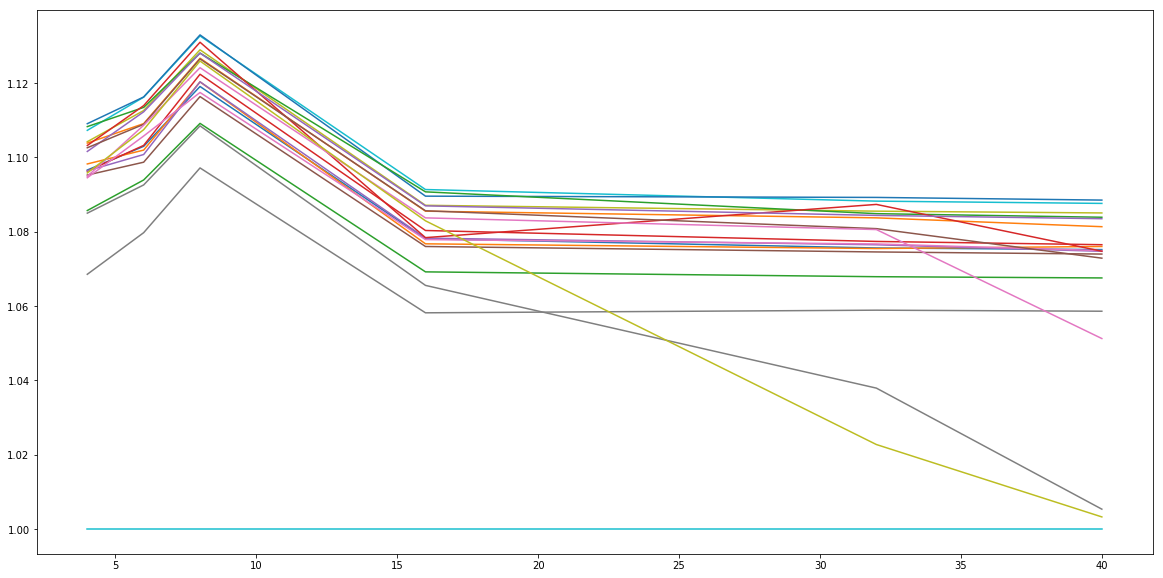

In [43]:
mpusR=[]
for i in range(len(f)):
    pusR=[]
    for st in lis:
        if (st[:3] == "W_R" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusR.append([(a == 0).sum(),ma3D/(sL)])


    mpusR.append(pusR)
mpusR=np.array(mpusR)

for pusR in mpusR:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,rsize/rsize)

In [44]:
len(mpusR)

19

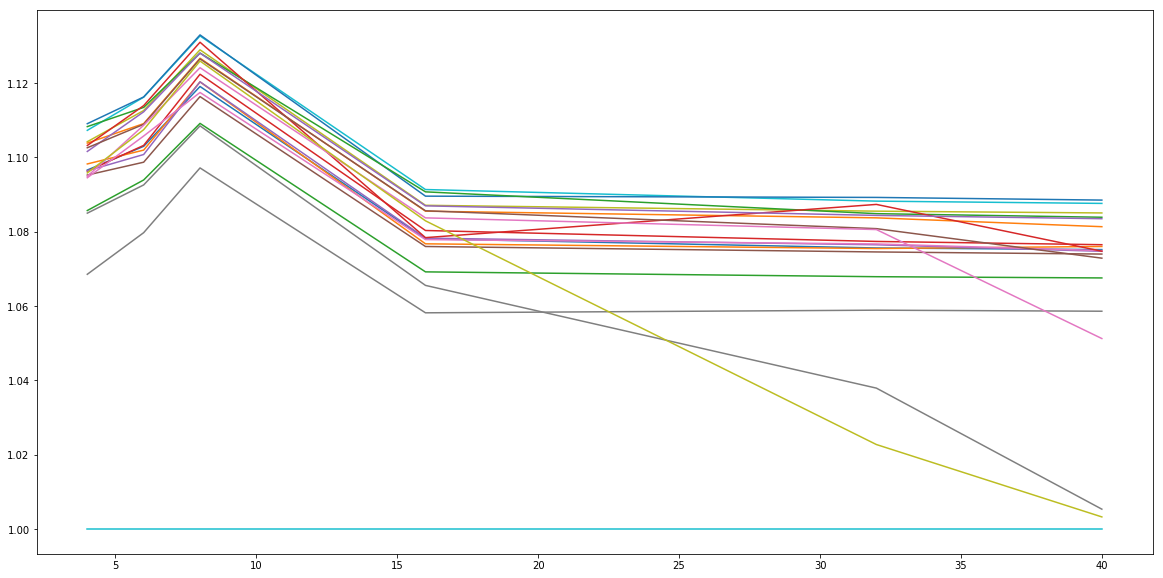

In [45]:
for pusR in mpusR:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,rsize/rsize)

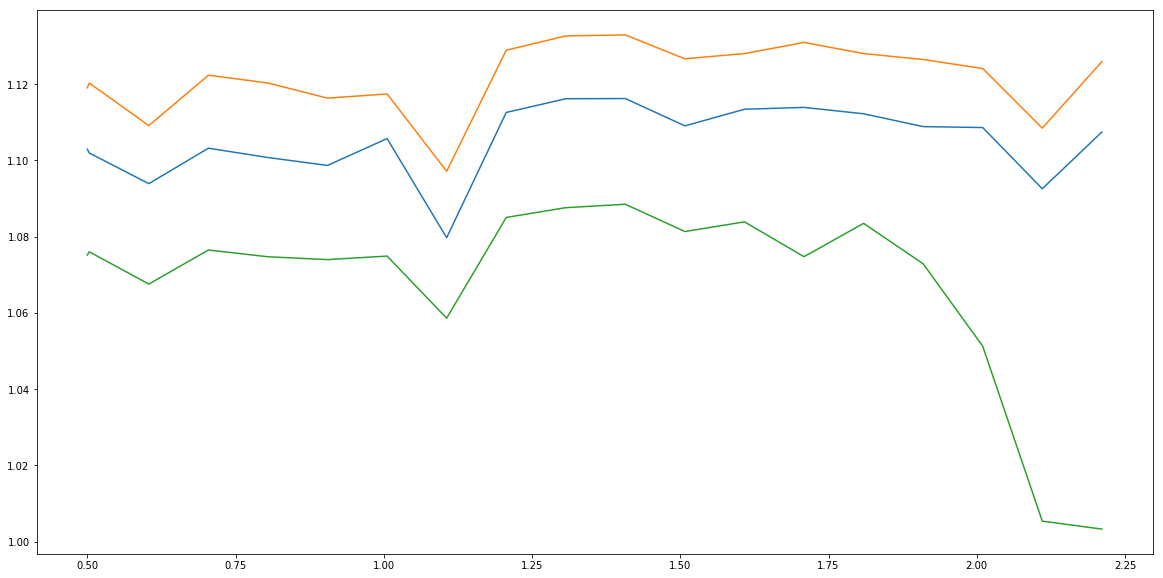

In [46]:
for ir in [1,2,-1]:
    plt.plot(ct,mpusR[:,ir,1]/(np.pi*(rsize[ir]/msa)**2))

# Gau

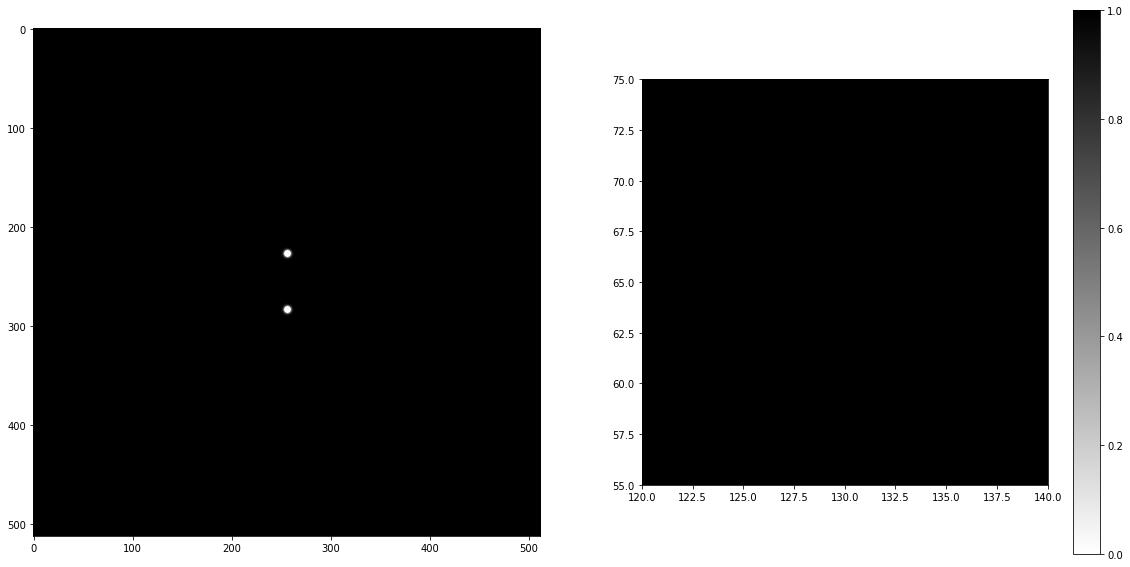

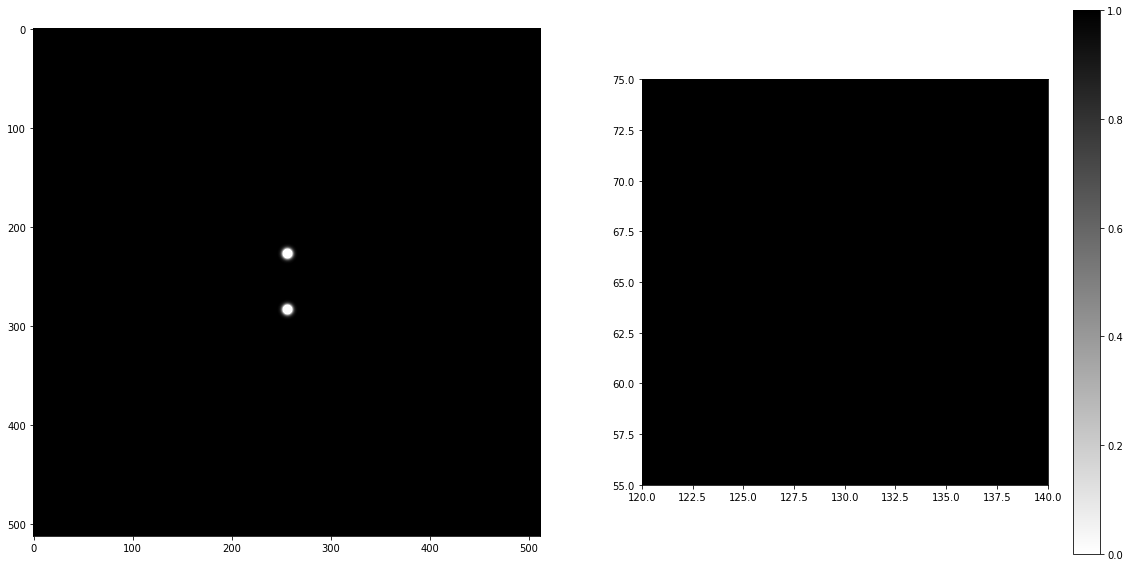

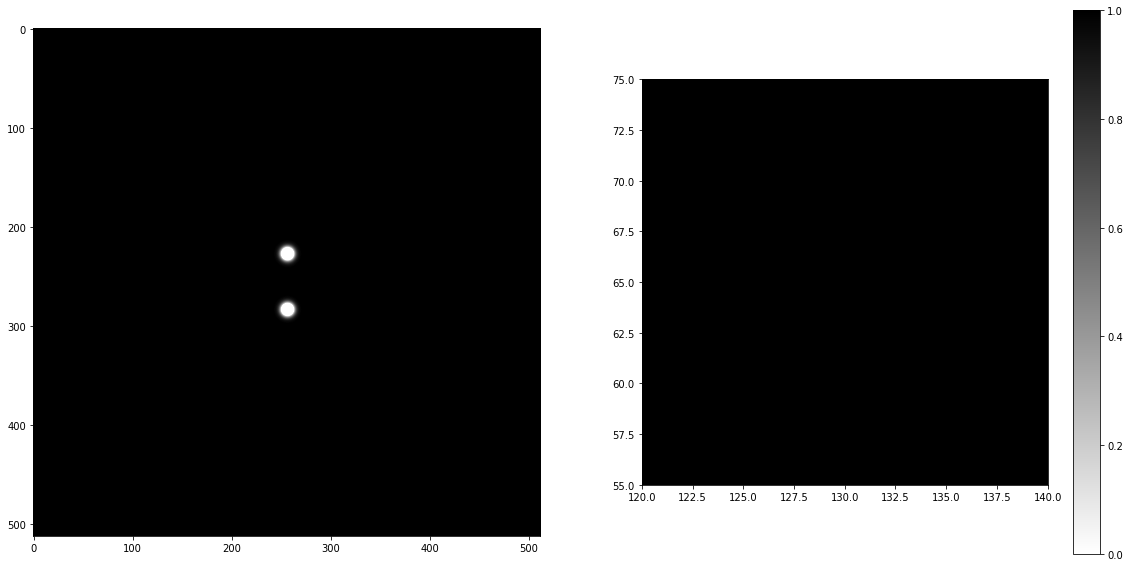

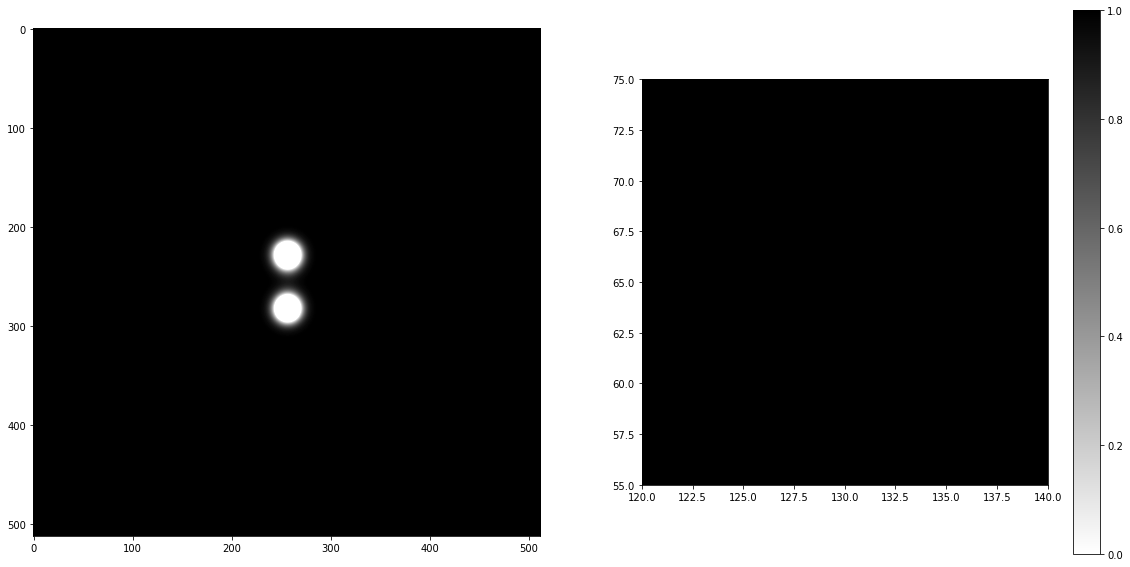

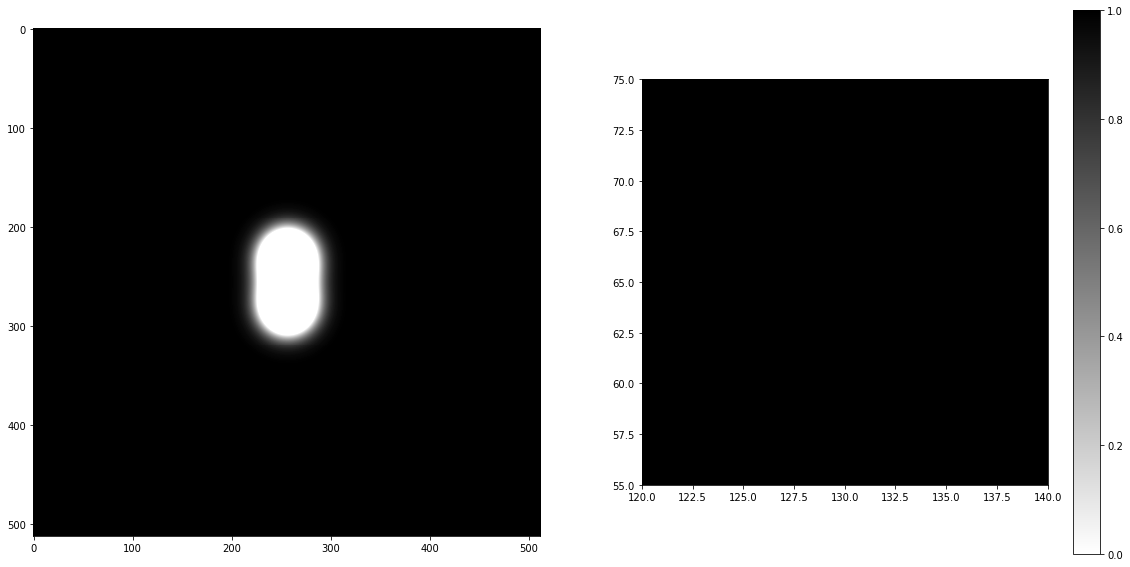

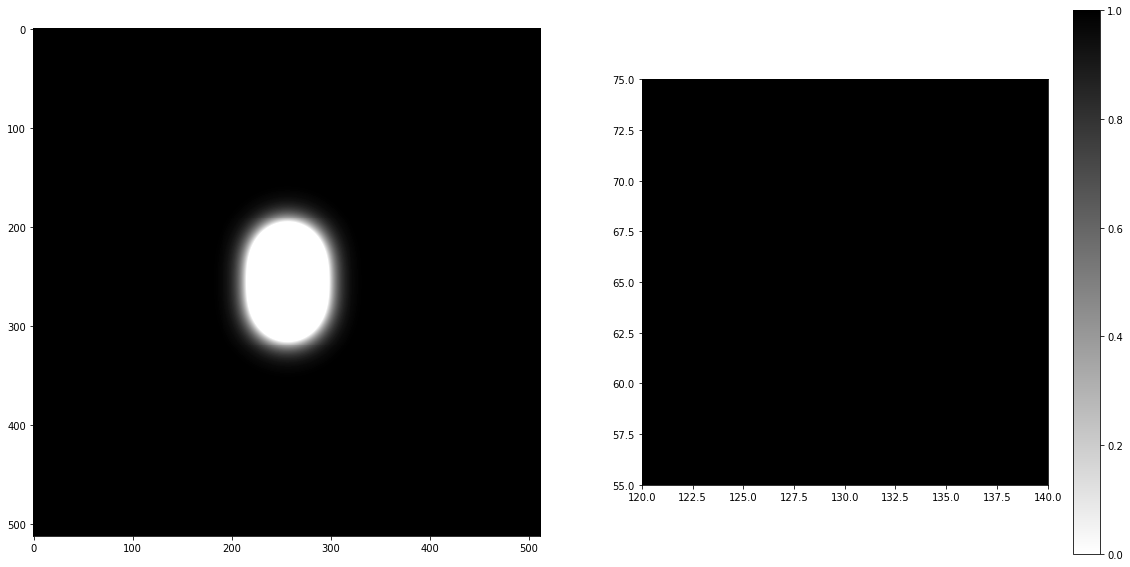

In [47]:
for st in lis:
    if (st[:3] == "W_G" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [48]:
pusG=[];
for st in lis:
    if (st[:3] == "W_G" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusG.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])
pusG=np.array(pusG)

(0.9, 1.1)

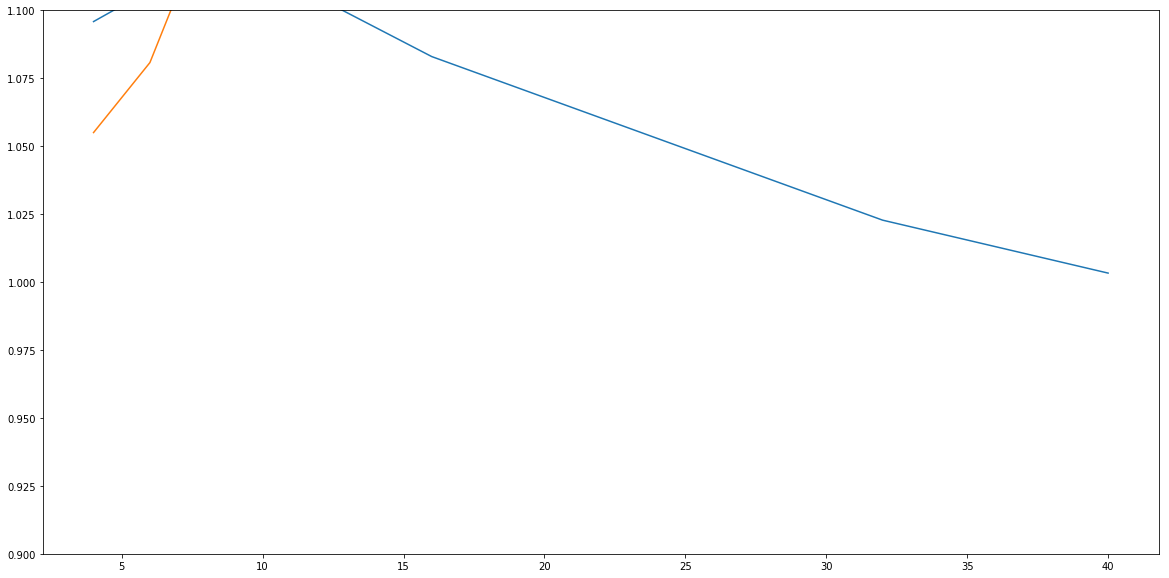

In [49]:
# REDO, Gau=Red, Gaus+tail
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,1]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,2]/(1.93*np.pi*(rsize/msa)**2))
plt.ylim([0.9,1.1])

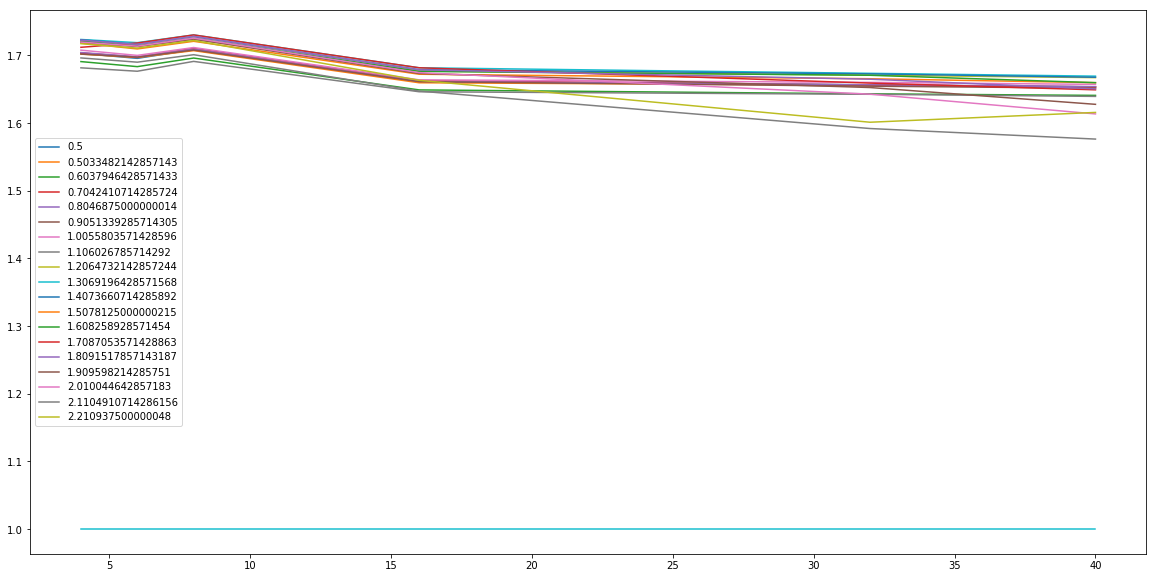

In [50]:
mpusG=[]
for i in range(len(f)):
    pusG=[]
    for st in lis:
        if (st[:3] == "W_G" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusG.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])
    mpusG.append(pusG)

mpusG=np.array(mpusG)

i=0
for pusG in mpusG:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusG[:,2]/(np.pi*(rsize/msa)**2),label=ct[i])
    i=i+1
plt.plot(rsize/msa,rsize/rsize)
plt.legend()

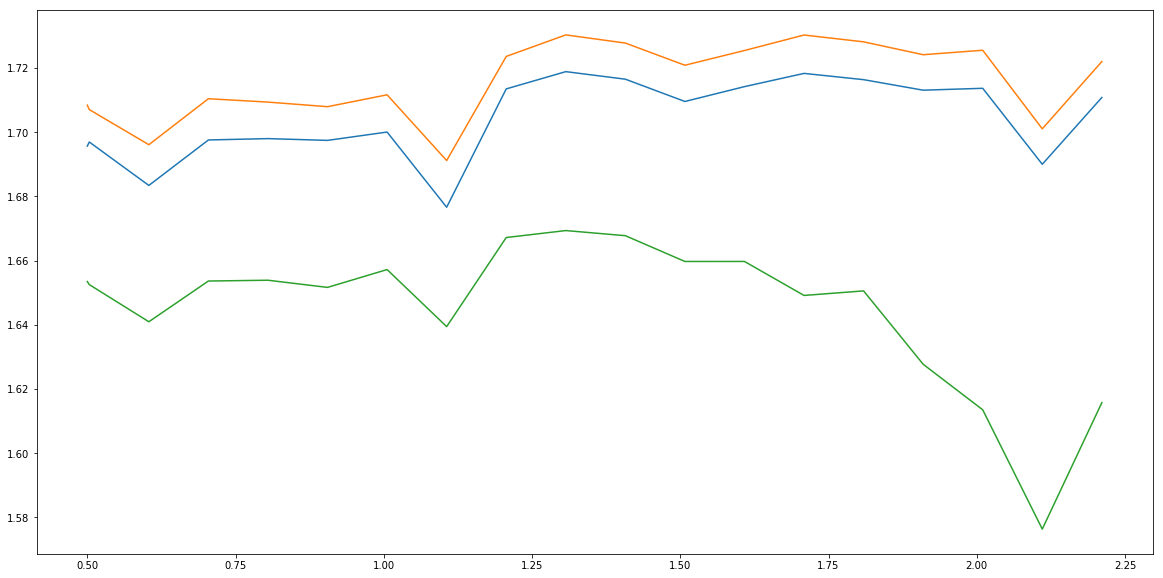

In [51]:
for ir in [1,2,-1]:
    plt.plot(ct,mpusG[:,ir,2]/(np.pi*(rsize[ir]/msa)**2))

# Viladoro 

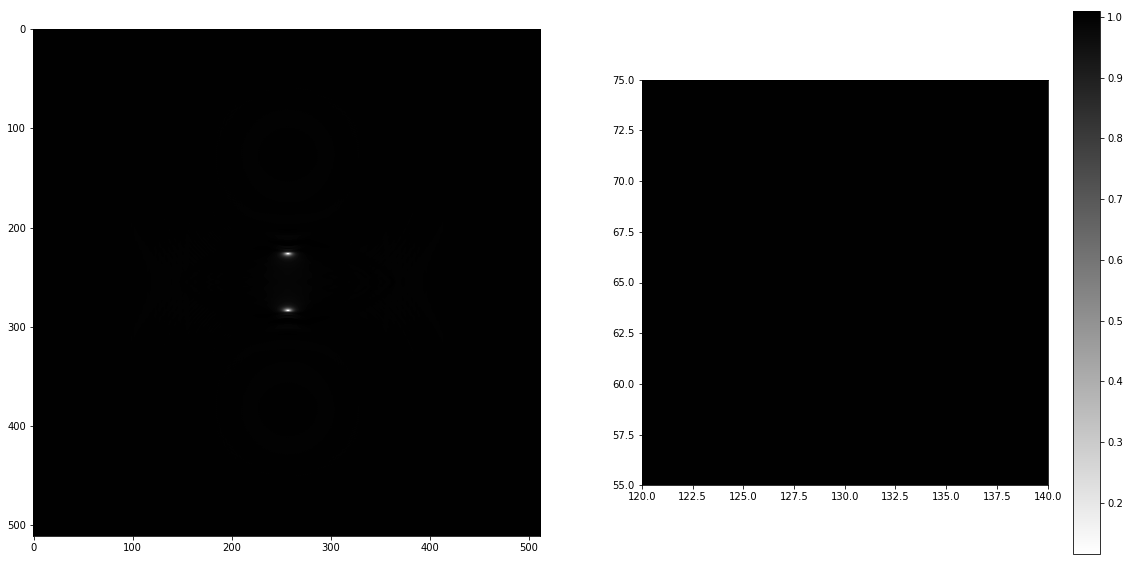

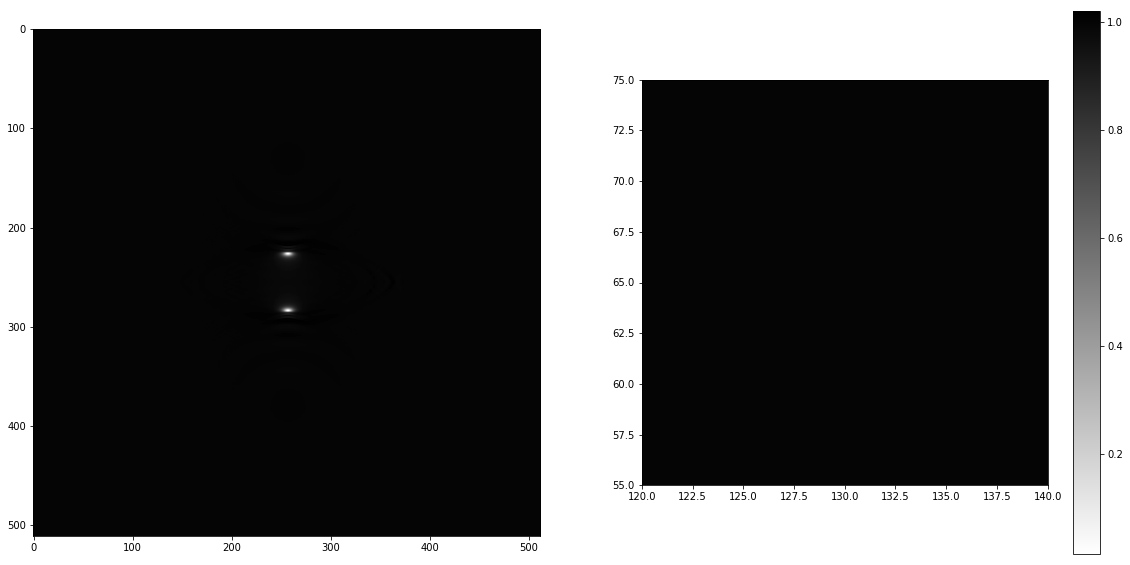

In [52]:
for st in lis:
    if (st[:4] == "W_Vi" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [53]:
pusV=[];
for st in lis:
    if (st[:3] == "W_V" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusV.append([(a == 0).sum(),(1-a).sum(),ma3D/sL])

pusV=np.array(pusV)

In [54]:
pusV

array([[  0.        ,  72.93843842,  38.63525391],
       [  0.        , 129.71908569,  68.39524639]])

In [55]:
mpusV=[]
for i in range(len(f)):
    pusV=[]
    for st in lis:
        if (st[:3] == "W_V" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusV.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])


    mpusV.append(pusV)
mpusV=np.array(mpusV)


In [56]:
mpusV

array([[[  0.        , 285.40054321, 137.40810608],
        [  0.        , 535.23797607, 253.91930318]],

       [[  0.        , 296.33981323, 141.97564053],
        [  0.        , 555.10455322, 262.27668866]],

       [[  0.        , 256.52914429, 126.30716312],
        [  0.        , 478.27996826, 231.82066083]],

       [[  0.        , 337.93188477, 167.60376459],
        [  0.        , 633.36291504, 310.0181147 ]],

       [[  0.        , 275.41711426, 134.95251103],
        [  0.        , 515.63366699, 249.61759681]],

       [[  0.        , 252.38299561, 128.73872451],
        [  0.        , 465.73568726, 234.18974402]],

       [[  0.        , 293.17373657, 149.55749421],
        [  0.        , 551.52893066, 278.63368056]],

       [[  0.        , 267.052948  , 135.43101986],
        [  0.        , 496.76425171, 248.66064075]],

       [[  0.        , 229.89949036, 117.47154398],
        [  0.        , 427.09643555, 215.45025651]],

       [[  0.        , 262.15841675, 138.91895

In [57]:
mpusV[0,0,2]

137.40810607531057

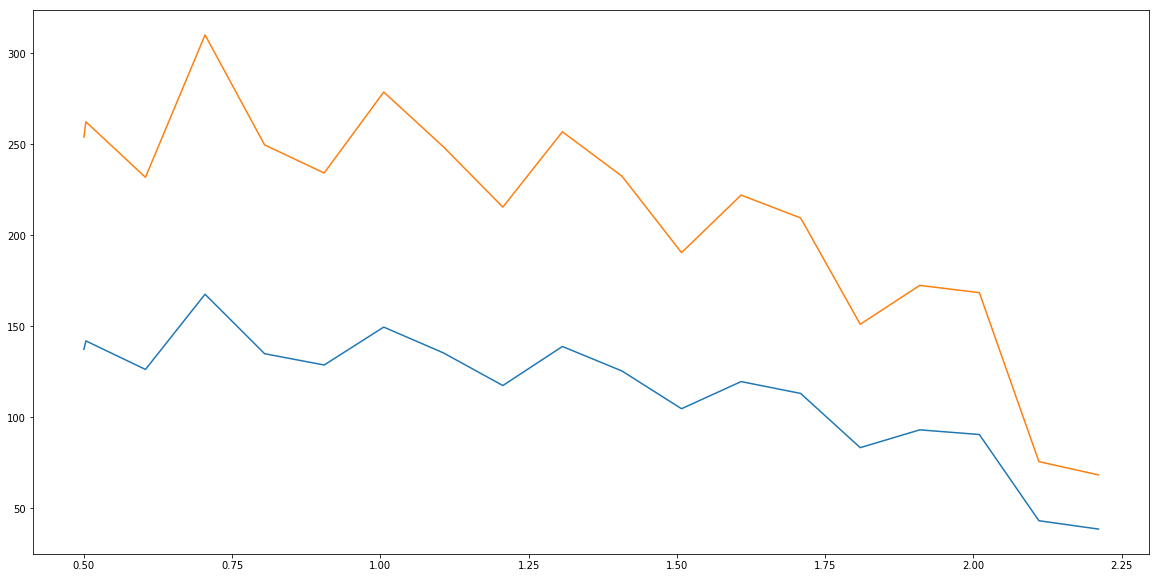

In [58]:
plt.plot(ct,ct/ct*mpusV[:,0,2])
plt.plot(ct,ct/ct*mpusV[:,1,2])


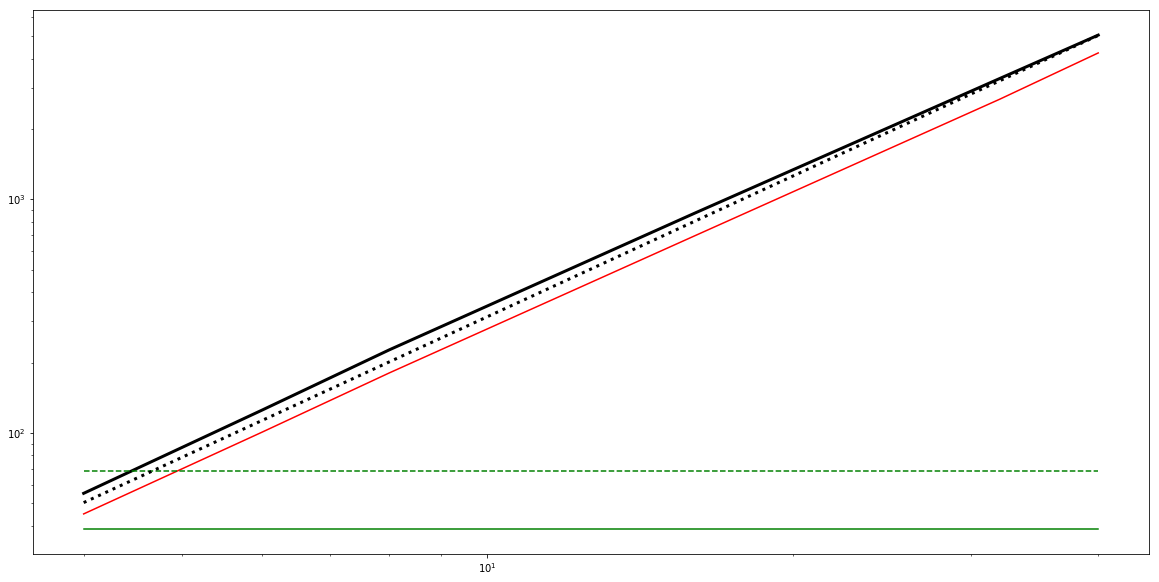

In [59]:
plt.loglog(rsize/msa,pusR[:,1],'k',linewidth=3)
plt.loglog(rsize/msa,pusG[:,2]/1.92,'r')

plt.loglog(rsize/msa,mpusV[-1,0,2]*rsize/rsize,'g')
plt.loglog(rsize/msa,mpusV[-1,1,2]*rsize/rsize,'g--')

plt.loglog(rsize/msa,np.pi*(rsize/msa)**2,'k:',linewidth=3)

(2, 6)

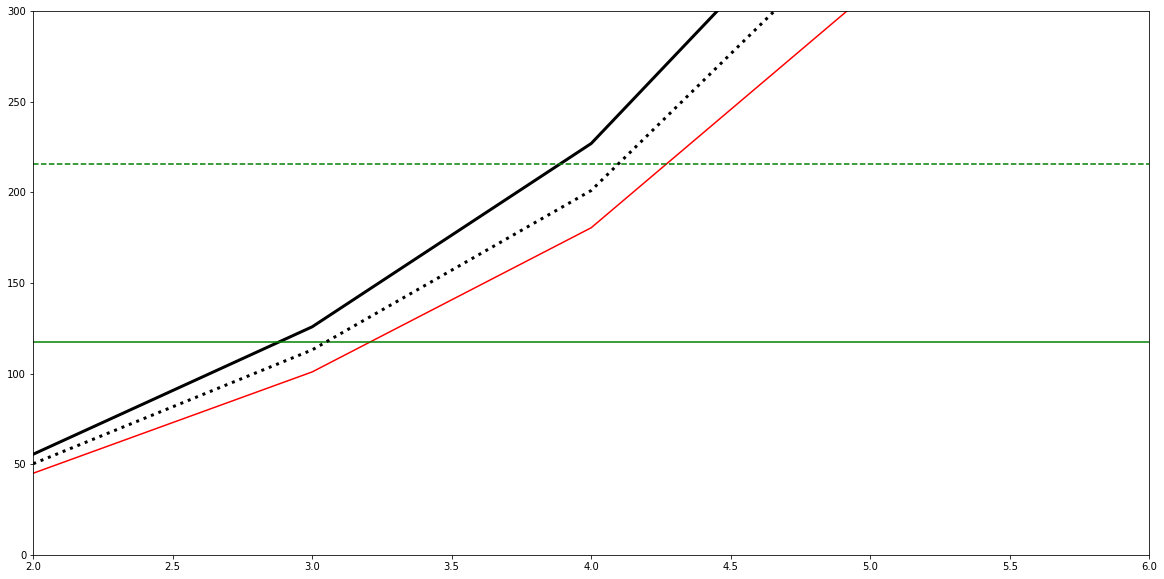

In [63]:
id = 8
plt.plot(rsize,mpusR[id,:,1],'k',linewidth=3)
plt.plot(rsize,mpusG[id,:,2]/1.92,'r')

plt.plot(rsize,mpusV[id,0,2]*rsize/rsize,'g')
plt.plot(rsize,mpusV[id,1,2]*rsize/rsize,'g--')

plt.plot(rsize,np.pi*(rsize/msa)**2,'k:',linewidth=3)
plt.ylim([0,300])
plt.xlim([2,6])